# Association Rules:

### Objective
The Objective of this assignment is to introduce students to rule mining techniques, particularly focusing on market basket analysis and provide hands on experience.Use the Online retail dataset to apply the association rules.


##  Task 1: Data Preprocessing

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
import pandas as pd

### Load the dataset

In [23]:
df = pd.read_excel('./Online retail.xlsx', header=None)

In [24]:
df.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [15]:
df1 = df.copy()

In [16]:
print(df1.columns)

Index([0], dtype='int64')


In [26]:
# basic information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [28]:
#  Check for missing values
df1.isnull().sum()

0    0
dtype: int64

#### -> NO missing values

In [30]:
#  Check for duplicate transactions
print("Number of duplicate transactions:", df1.duplicated().sum())

Number of duplicate transactions: 2325


In [31]:
df2 = df.drop_duplicates()
df2

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7493,"burgers,salmon,pancakes,french fries,frozen sm..."
7494,"turkey,burgers,dessert wine,shrimp,pasta,tomat..."
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."


In [32]:
df2.reset_index(drop=True, inplace=True)

In [35]:
df2.shape

(5176, 1)

In [36]:
df2.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5176 entries, 0 to 5175
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5176 non-null   object
dtypes: object(1)
memory usage: 40.6+ KB


In [38]:
# Convert single-column DataFrame to list of lists
transactions = df2[0].apply(lambda x: x.split(',')).tolist()

In [39]:
# Display the first 5 transactions to confirm
print("First 5 transactions:")
for i in range(5):
    print(transactions[i])

First 5 transactions:
['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


## Task 2: Association Rule Mining

### Objective:

Apply the Apriori algorithm to discover frequent itemsets

Generate association rules using mlxtend

Set appropriate thresholds for support, confidence, and lift to extract meaningful rules

In [40]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/4c/43/2fc7f76c8891aef148901f1ba3dee65c1cbac00a85ae5ee0dabc2b861256/mlxtend-0.23.4-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.3.1 from https://files.pythonhosted.org/packages/f4/5a/ba91b8c57aa37dbd80d5ff958576a9a8c14317b04b671ae7f0d09b00993a/scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 660.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 1.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 2.9 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 4.9

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ppscore 1.3.0 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.3.0 which is incompatible.


In [54]:
# Import required libraries
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [55]:
#  Convert transaction data into one-hot encoded dataframe
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

In [56]:
#  Convert encoded array to DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [57]:
#  View the one-hot encoded dataframe (first 5 rows)
df_encoded.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


### Applying Apriori Algorithm

In [58]:
#  Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

In [59]:
#  View the frequent itemsets
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets
37,0.299845,(mineral water)
52,0.229521,(spaghetti)
15,0.208076,(eggs)
11,0.205178,(chocolate)
19,0.192620,(french fries)
36,0.170015,(milk)
26,0.169243,(green tea)
27,0.135819,(ground beef)
24,0.129830,(frozen vegetables)
43,0.125193,(pancakes)


### Generate Association Rules

In [60]:
# Generate rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [61]:
#  View first 10 rules
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(chocolate),(burgers),0.205178,0.113794,0.024536,0.119586,1.050892,1.0,0.001188,1.006578,0.060929,0.083333,0.006535,0.167603
1,(burgers),(chocolate),0.113794,0.205178,0.024536,0.215620,1.050892,1.0,0.001188,1.013312,0.054646,0.083333,0.013137,0.167603
2,(eggs),(burgers),0.208076,0.113794,0.036128,0.173630,1.525826,1.0,0.012450,1.072408,0.435164,0.126437,0.067519,0.245559
3,(burgers),(eggs),0.113794,0.208076,0.036128,0.317487,1.525826,1.0,0.012450,1.160307,0.388868,0.126437,0.138159,0.245559
4,(french fries),(burgers),0.192620,0.113794,0.029366,0.152457,1.339761,1.0,0.007447,1.045618,0.314100,0.105997,0.043628,0.205261
5,(burgers),(french fries),0.113794,0.192620,0.029366,0.258065,1.339761,1.0,0.007447,1.088208,0.286162,0.105997,0.081058,0.205261
6,(green tea),(burgers),0.169243,0.113794,0.024923,0.147260,1.294090,1.0,0.005664,1.039245,0.273553,0.096557,0.037763,0.183138
7,(burgers),(green tea),0.113794,0.169243,0.024923,0.219015,1.294090,1.0,0.005664,1.063731,0.256438,0.096557,0.059912,0.183138
8,(milk),(burgers),0.170015,0.113794,0.025502,0.150000,1.318166,1.0,0.006156,1.042595,0.290813,0.098728,0.040855,0.187054
9,(burgers),(milk),0.113794,0.170015,0.025502,0.224109,1.318166,1.0,0.006156,1.069717,0.272364,0.098728,0.065174,0.187054


### Set Thresholds and Filter Meaningful Rules

In [62]:
#  Filter rules based on desired thresholds
filtered_rules = rules[(rules['support'] >= 0.03) & 
                       (rules['confidence'] >= 0.3) & 
                       (rules['lift'] >= 2)]

In [63]:
#  View filtered rules
filtered_rules.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [64]:
print("Total rules generated:", rules.shape[0])

Total rules generated: 216


In [65]:
print(rules[['support', 'confidence', 'lift']].describe())

          support  confidence        lift
count  216.000000  216.000000  216.000000
mean     0.030454    0.215854    1.322315
std      0.012537    0.098643    0.237818
min      0.020093    0.067010    1.013539
25%      0.022604    0.126013    1.161608
50%      0.025116    0.218736    1.278631
75%      0.033472    0.274637    1.422457
max      0.085008    0.471390    2.525588


### Why the initial filter gave no output:
The reason the original filter criteria returned no rules is because the threshold values were too tight relative to the distribution of the rule metrics in the dataset:

Only about 25% of the rules have support greater than 0.033

Confidence ≥ 0.3 would exclude 75% of the rules, as most confidence values fall below this threshold

Lift ≥ 2 is rare in this dataset, with a maximum lift of only 2.52 and 75% of rules below 1.42

As a result, it’s highly unlikely for any rule to satisfy all three criteria at once, leading to an empty filtered result.

In [66]:
filtered_rules = rules[(rules['support'] >= 0.025) & 
                       (rules['confidence'] >= 0.2) & 
                       (rules['lift'] >= 1.4)]

print("Filtered rules count:", filtered_rules.shape[0])
filtered_rules.sort_values(by='lift', ascending=False).head(10)


Filtered rules count: 12


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
132,(spaghetti),(ground beef),0.229521,0.135819,0.055835,0.243266,1.791102,1.0,0.024661,1.141988,0.573260,0.180400,0.124334,0.327181
133,(ground beef),(spaghetti),0.135819,0.229521,0.055835,0.411095,1.791102,1.0,0.024661,1.308326,0.511102,0.180400,0.235664,0.327181
173,(olive oil),(spaghetti),0.087713,0.229521,0.032457,0.370044,1.612246,1.0,0.012326,1.223068,0.416258,0.113976,0.182384,0.255729
163,(soup),(mineral water),0.070904,0.299845,0.033423,0.471390,1.572109,1.0,0.012163,1.324519,0.391684,0.099084,0.245009,0.291429
106,(frozen vegetables),(milk),0.129830,0.170015,0.034003,0.261905,1.540476,1.0,0.011930,1.124495,0.403197,0.127907,0.110712,0.230952
107,(milk),(frozen vegetables),0.170015,0.129830,0.034003,0.200000,1.540476,1.0,0.011930,1.087713,0.422719,0.127907,0.080639,0.230952
3,(burgers),(eggs),0.113794,0.208076,0.036128,0.317487,1.525826,1.0,0.012450,1.160307,0.388868,0.126437,0.138159,0.245559
149,(shrimp),(milk),0.098918,0.170015,0.025502,0.257812,1.516406,1.0,0.008685,1.118295,0.377930,0.104762,0.105782,0.203906
155,(olive oil),(mineral water),0.087713,0.299845,0.038640,0.440529,1.469186,1.0,0.012340,1.251457,0.350055,0.110742,0.200932,0.284697
83,(turkey),(eggs),0.083269,0.208076,0.025116,0.301624,1.449588,1.0,0.007790,1.133951,0.338320,0.094340,0.118128,0.211165


### Filtered Rules Summary:
After adjusting the threshold values to better match the distribution of the dataset:

Support ≥ 0.025

Confidence ≥ 0.2

Lift ≥ 1.4

We obtained 12 meaningful association rules. These rules reveal interesting product combinations that frequently appear together in customer transactions.

### Insights from Top Rules:
spaghetti → ground beef
Customers who buy spaghetti have a 24.3% chance of also buying ground beef in the same transaction, with a lift of 1.79 — meaning they’re bought together 1.79 times more often than by chance.

frozen vegetables → milk
This pair has a 26.1% confidence and a lift of 1.54, suggesting a moderate association worth targeting in promotions.

soup → mineral water
A notably strong confidence of 47.1% and lift of 1.57, indicating customers buying soup often pick up mineral water too.

### Overall Analysis:
Most lifts range from 1.4 to 1.79, confirming useful but moderate associations.

Product pairs involving spaghetti, milk, eggs, mineral water, olive oil, and ground beef appear most often in strong association rules.

This can help inform marketing strategies like product bundling and cross-promotions.



##  Task 3: Analysis & Interpretation
### Objective:

Analyze the filtered association rules

Visualize useful patterns

Derive actionable insights about customer purchasing behavior



###  Top Rules by Lift (Bar Plot)

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Select top 10 rules by lift
top_rules = filtered_rules.sort_values(by='lift', ascending=False).head(10)

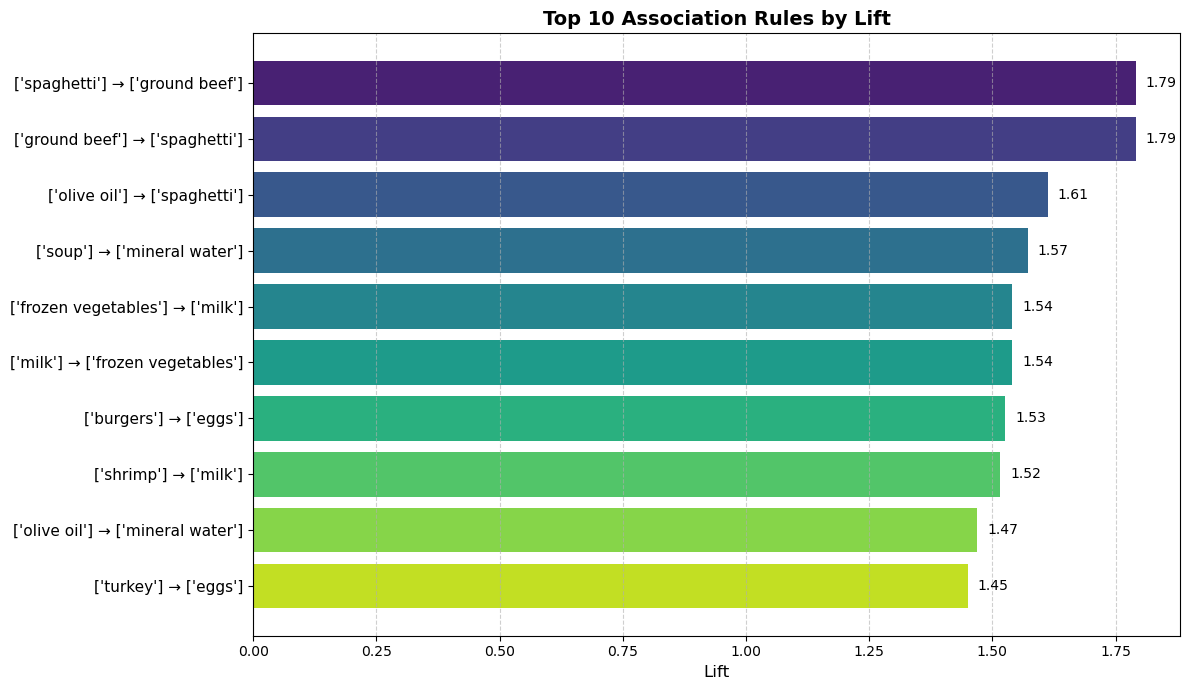

In [85]:
# Set style
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(12,7))

# Barplot
bars = plt.barh(
    range(len(top_rules)), 
    top_rules['lift'], 
    color=sns.color_palette("viridis", len(top_rules))
)

# Add value labels
for bar in bars:
    plt.text(
        bar.get_width() + 0.02, 
        bar.get_y() + bar.get_height()/2, 
        f"{bar.get_width():.2f}", 
        va='center', fontsize=10
    )

# Customizing y-axis labels
plt.yticks(
    range(len(top_rules)), 
    [f"{list(a)} → {list(c)}" for a,c in zip(top_rules['antecedents'], top_rules['consequents'])],
    fontsize=11
)

# Titles and labels
plt.xlabel('Lift', fontsize=12)
plt.title('Top 10 Association Rules by Lift', fontsize=14, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Top Rules by Confidence (Bar Plot)

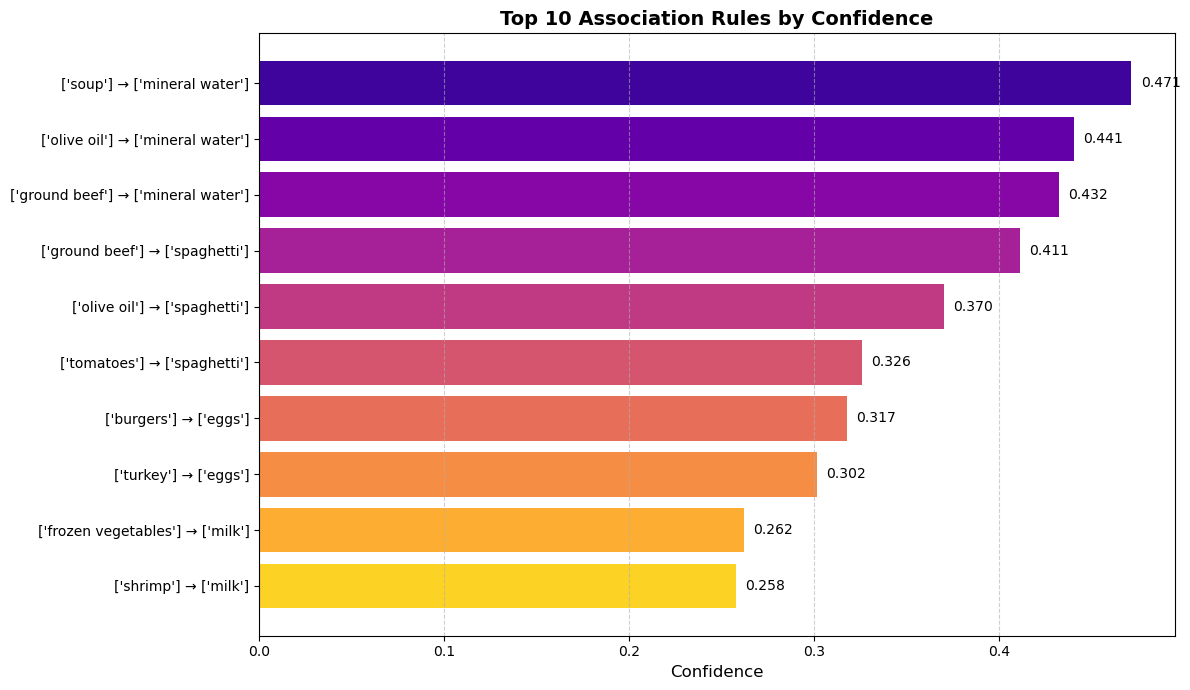

In [93]:
# Sort and select top 10 by confidence
top_confidence_rules = filtered_rules.sort_values(by='confidence', ascending=False).head(10)

# Set style
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(12, 7))

# Barplot
bars = plt.barh(
    [f"{list(a)} → {list(c)}" for a, c in zip(top_confidence_rules['antecedents'], top_confidence_rules['consequents'])],
    top_confidence_rules['confidence'],
    color=sns.color_palette("plasma", len(top_confidence_rules))
)

# Value labels
for bar in bars:
    plt.text(
        bar.get_width() + 0.005, 
        bar.get_y() + bar.get_height()/2, 
        f"{bar.get_width():.3f}", 
        va='center', fontsize=10
    )

# Titles and labels
plt.xlabel('Confidence', fontsize=12)
plt.title('Top 10 Association Rules by Confidence', fontsize=14, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Top Association Rules by Support 

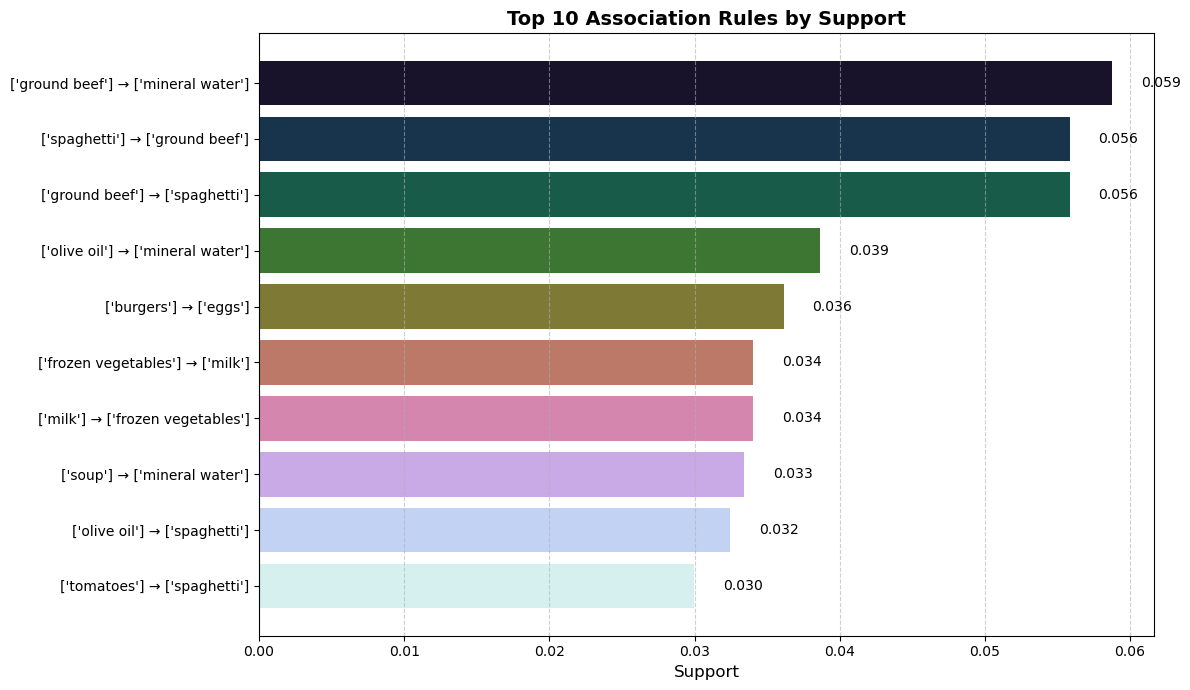

In [88]:
# Sort and select top 10 by support
top_support_rules = filtered_rules.sort_values(by='support', ascending=False).head(10)

# Set style
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(12, 7))

# Barplot
bars = plt.barh(
    [f"{list(a)} → {list(c)}" for a, c in zip(top_support_rules['antecedents'], top_support_rules['consequents'])],
    top_support_rules['support'],
    color=sns.color_palette("cubehelix", len(top_support_rules))
)

# Value labels
for bar in bars:
    plt.text(
        bar.get_width() + 0.002, 
        bar.get_y() + bar.get_height()/2, 
        f"{bar.get_width():.3f}", 
        va='center', fontsize=10
    )

# Titles and labels
plt.xlabel('Support', fontsize=12)
plt.title('Top 10 Association Rules by Support', fontsize=14, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Top Frequent Single Items by Support

In [91]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
top_items = frequent_itemsets[frequent_itemsets['length'] == 1].sort_values(by='support', ascending=False).head(10)

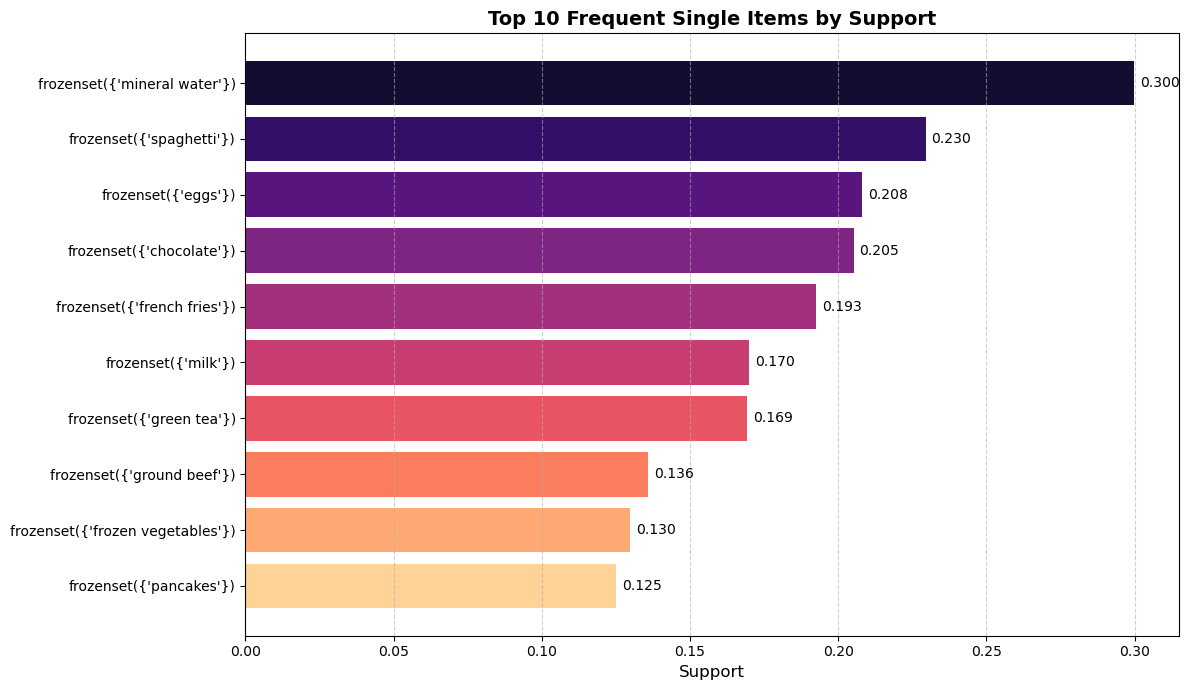

In [92]:
# Set style
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(12, 7))

# Barplot
bars = plt.barh(
    top_items['itemsets'].astype(str),
    top_items['support'],
    color=sns.color_palette("magma", len(top_items))
)

# Value labels
for bar in bars:
    plt.text(
        bar.get_width() + 0.002, 
        bar.get_y() + bar.get_height()/2, 
        f"{bar.get_width():.3f}", 
        va='center', fontsize=10
    )

# Titles and labels
plt.xlabel('Support', fontsize=12)
plt.title('Top 10 Frequent Single Items by Support', fontsize=14, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Interpretation Summary 
The analysis of the generated association rules highlights several notable product pairings:

Items like spaghetti, ground beef, milk, mineral water, and eggs frequently appear together in strong association rules.

The strongest rule, spaghetti → ground beef, achieves a lift of 1.79 and a confidence of 24.3%, indicating these items are often bought together and would be ideal candidates for cross-promotional strategies.

High-confidence rules (above 40%) include soup → mineral water, suggesting valuable combinations for bundled product offers.

Overall, the results reveal consistent patterns of complementary product purchases, reaffirming the effectiveness of market basket analysis in uncovering actionable insights for retail business decisions.

## Interview Questions:


### 1. What is lift and why is it important in Association Rules?

Lift measures how much more often two items are bought together than would be expected if they were independent.

**Formula:**

$$
\text{Lift(A → B)} = \frac{\text{Support(A and B)}}{\text{Support(A)} \times \text{Support(B)}}
$$

**Importance:**

* A lift value greater than 1 indicates a positive association, meaning the presence of item A increases the likelihood of purchasing item B.
* It helps identify strong, meaningful, and non-random associations between items.
* Useful for making decisions about product bundling, promotions, and store layout.



### 2. What is Support and Confidence? How do you calculate them?

**Support**

* Support measures how frequently an item or itemset appears in the dataset.

**Formula:**

$$
\text{Support(A)} = \frac{\text{Number of transactions containing A}}{\text{Total number of transactions}}
$$

**Confidence**

* Confidence indicates the likelihood that a transaction containing item A also contains item B.

**Formula:**

$$
\text{Confidence(A → B)} = \frac{\text{Support(A and B)}}{\text{Support(A)}}
$$

Both metrics are essential for evaluating the strength and reliability of association rules.



### 3. What are some limitations or challenges of Association Rule Mining?

* It can generate a large number of rules, many of which may be trivial or uninteresting if thresholds are not carefully chosen.
* Determining appropriate support, confidence, and lift thresholds requires domain knowledge and experimentation.
* Computationally expensive on large datasets, as the number of possible item combinations increases rapidly.
* Association rules identify co-occurrence, not causality, meaning they show which items are bought together but not why.
* Rare but potentially valuable associations might be missed if the minimum support is set too high.
* Results often require additional filtering, sorting, or visualization to extract actionable insights.

